In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(500)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
  
Corpus = pd.read_csv("/content/drive/MyDrive/Uottawa /data science/books_data_50.csv")
print(Corpus)

      Unnamed: 0 Author                                               Text
0              0      a  surprised, nor must you doubt my friendship, i...
1              1      a  large, firm, white and comely. But the hand wh...
2              2      a  occupied entire; and at the door of this, whic...
3              3      a  guilty of that crime upon so pitiful a provoca...
4              4      a  awaiting my arrival; he had received by the sa...
...          ...    ...                                                ...
1495        1495      e  only with the wide assortment of materials use...
1496        1496      e  way for hundreds of miles across the trackless...
1497        1497      e  Fails.—It is hard to realize the extent of the...
1498        1498      e  as effectively hidden and secure from all the ...
1499        1499      e  late in April, or in May, there might have bee...

[1500 rows x 3 columns]


In [ ]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Remove blank rows if any.
Corpus['Text'].dropna(inplace=True)
#Change all the text to lower case.
Corpus['Text'] = [entry.lower() for entry in Corpus['Text']]
#Tokenization
Corpus['Text']= [word_tokenize(entry) for entry in Corpus['Text']]
#Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Text']):
  Final_words = []
  word_Lemmatized = WordNetLemmatizer()
  for word, tag in pos_tag(entry):
    if word not in stopwords.words('english') and word.isalpha():
      word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
      Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
  Corpus.loc[index,'text_final'] = str(Final_words)

In [ ]:
Corpus.head(1)

,Author,Text,text_final
0,a,"[surprised, ,, nor, must, you, doubt, my, frie...","['surprised', 'must', 'doubt', 'friendship', '..."


In [ ]:
from google.colab import data_table
data_table.DataTable(Corpus, include_index=False, num_rows_per_page=1)

,Author,Text,text_final
0,a,"[surprised, ,, nor, must, you, doubt, my, frie...","['surprised', 'must', 'doubt', 'friendship', '..."
1,a,"[large, ,, firm, ,, white, and, comely, ., but...","['large', 'firm', 'white', 'comely', 'hand', '..."
2,a,"[occupied, entire, ;, and, at, the, door, of, ...","['occupied', 'entire', 'door', 'wear', 'great'..."
3,a,"[guilty, of, that, crime, upon, so, pitiful, a...","['guilty', 'crime', 'upon', 'pitiful', 'provoc..."
4,a,"[awaiting, my, arrival, ;, he, had, received, ...","['await', 'arrival', 'receive', 'post', 'mine'..."
...,...,...,...
1495,e,"[only, with, the, wide, assortment, of, materi...","['wide', 'assortment', 'material', 'use', 'als..."
1496,e,"[way, for, hundreds, of, miles, across, the, t...","['way', 'hundred', 'mile', 'across', 'trackles..."
1497,e,"[fails.—it, is, hard, to, realize, the, extent...","['hard', 'realize', 'extent', 'havoc', 'wrough..."
1498,e,"[as, effectively, hidden, and, secure, from, a...","['effectively', 'hide', 'secure', 'terror', 'e..."


In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Author'],test_size=0.2)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Tfidf_vect.vocabulary_)

{'surprised': 4276, 'must': 2895, 'doubt': 1369, 'friendship': 1767, 'door': 1361, 'often': 3047, 'shut': 3864, 'even': 1550, 'suffer': 4228, 'go': 1874, 'dark': 1147, 'way': 4837, 'bring': 571, 'punishment': 3392, 'danger': 1141, 'name': 2903, 'chief': 764, 'sinner': 3903, 'large': 2500, 'firm': 1684, 'white': 4887, 'comely': 873, 'hand': 1990, 'saw': 3694, 'clearly': 811, 'enough': 1526, 'yellow': 4986, 'light': 2570, 'morning': 2853, 'lie': 2566, 'half': 1982, 'bedclothes': 400, 'lean': 2529, 'cord': 1024, 'knuckly': 2467, 'dusky': 1423, 'pallor': 3139, 'thickly': 4403, 'shade': 3804, 'swart': 4295, 'growth': 1950, 'hair': 1979, 'occupied': 3031, 'entire': 1530, 'wear': 4844, 'great': 1916, 'air': 110, 'wealth': 4841, 'comfort': 875, 'though': 4420, 'plunge': 3281, 'darkness': 1151, 'except': 1569, 'fanlight': 1633, 'utterson': 4725, 'stop': 4148, 'knock': 2459, 'elderly': 1484, 'servant': 3786, 'open': 3057, 'jekyll': 2399, 'home': 2105, 'poole': 3297, 'ask': 268, 'lawyer': 2519, '

In [ ]:
print(Train_X_Tfidf)

  (0, 4895)	0.21661519789766293
  (0, 4443)	0.21462791246780177
  (0, 4340)	0.29388730732467244
  (0, 3870)	0.18543671929224992
  (0, 3386)	0.29388730732467244
  (0, 3254)	0.2821696506873564
  (0, 3053)	0.11803052619490151
  (0, 2838)	0.17186732234727903
  (0, 2129)	0.17324817565740125
  (0, 2086)	0.2656545412308225
  (0, 2055)	0.31040241678120634
  (0, 1998)	0.1974713524058066
  (0, 1477)	0.22090666568043862
  (0, 1446)	0.2656545412308225
  (0, 1427)	0.2409658591684008
  (0, 847)	0.31040241678120634
  (0, 827)	0.18268975016481043
  (0, 399)	0.18358497898459503
  (1, 4942)	0.25316327340888195
  (1, 4199)	0.21636357720197982
  (1, 4006)	0.25316327340888195
  (1, 3956)	0.1894775718495057
  (1, 3064)	0.265657832129424
  (1, 2932)	0.265657832129424
  (1, 2878)	0.23555318196587927
  :	:
  (1199, 4961)	0.1132674593147787
  (1199, 4628)	0.25801281029279094
  (1199, 4576)	0.1701780157275295
  (1199, 4136)	0.14350306389209166
  (1199, 4109)	0.16368876949132316
  (1199, 4049)	0.26660022671838557

In [ ]:
# SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score:",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score: 91.66666666666666


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Test_Y,predictions_SVM))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        55
           1       0.83      0.88      0.85        59
           2       1.00      0.95      0.97        74
           3       0.86      0.89      0.87        62
           4       1.00      0.94      0.97        50

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
cv_scores = cross_val_score(SVM,Train_X_Tfidf,Train_Y,cv=kf)

In [ ]:
cv_scores

array([0.9       , 0.88333333, 0.94166667, 0.80833333, 0.89166667,
       0.85833333, 0.89166667, 0.925     , 0.89166667, 0.86666667])

In [ ]:
cv_scores.mean()

0.8858333333333333

Normalized confusion matrix
[[0.92727273 0.07272727 0.         0.         0.        ]
 [0.01694915 0.88135593 0.         0.10169492 0.        ]
 [0.02702703 0.         0.94594595 0.02702703 0.        ]
 [0.01612903 0.09677419 0.         0.88709677 0.        ]
 [0.02       0.02       0.         0.02       0.94      ]]


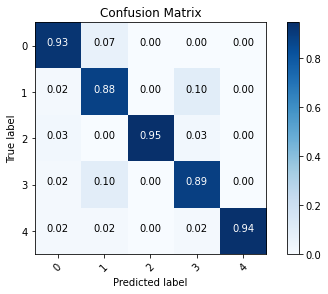

In [ ]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(Test_Y,predictions_SVM)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')

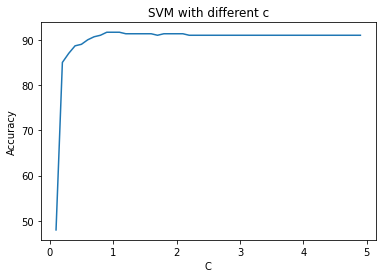

In [ ]:
x=[]
y=[]
for i in np.arange(0.1,5.0,0.1):
  x.append(i)
  SVM = svm.SVC(C=i, kernel='linear', degree=3, gamma='auto')
  SVM.fit(Train_X_Tfidf,Train_Y)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(Test_X_Tfidf)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_SVM, Test_Y)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM with different c") 
plt.show()

In [ ]:
y

[48.0,
 85.0,
 87.0,
 88.66666666666667,
 89.0,
 90.0,
 90.66666666666666,
 91.0,
 91.66666666666666,
 91.66666666666666,
 91.66666666666666,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.0,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0]

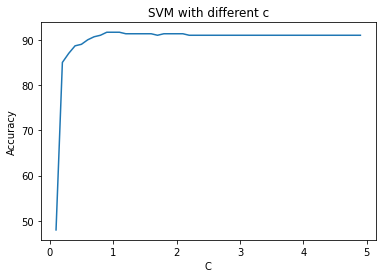

In [ ]:
x=[]
y=[]
for i in np.arange(0.1,5.0,0.1):
  x.append(i)
  SVM = svm.SVC(C=i, kernel='linear', degree=1, gamma='auto')
  SVM.fit(Train_X_Tfidf,Train_Y)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(Test_X_Tfidf)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_SVM, Test_Y)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM with different c") 
plt.show()

In [ ]:
y

[48.0,
 85.0,
 87.0,
 88.66666666666667,
 89.0,
 90.0,
 90.66666666666666,
 91.0,
 91.66666666666666,
 91.66666666666666,
 91.66666666666666,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.0,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.33333333333333,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0,
 91.0]